In [ ]:
#TensorFlow library
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
#library import
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix, without normalisation")



  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
        horizontalalignment='center',
        color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Load data
#Load data
imageset = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = imageset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:" ,x_train.shape)
print("y_train.shape:" ,y_train.shape)
print("x_test.shape:" ,x_test.shape)
print("y_test.shape:" ,y_test.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [ ]:
#preparing data for Convolution, available data is 2D, convolution require H X W X C
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape:", x_train.shape)
print("x_test.shape:" ,x_test.shape)

x_train.shape: (60000, 28, 28, 1)
x_test.shape: (10000, 28, 28, 1)


In [ ]:
#Number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
#Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
#compile and fit
#use GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_train = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test, y_test), epochs=15 )

Epoch 1/15
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1851 - accuracy: 0.9434 - val_loss: 0.0574 - val_accuracy: 0.9816
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0678 - accuracy: 0.9790 - val_loss: 0.0483 - val_accuracy: 0.9851
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0496 - accuracy: 0.9847 - val_loss: 0.0448 - val_accuracy: 0.9868
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0391 - val_accuracy: 0.9879
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0402 - val_accuracy: 0.9888
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0386 - val_accuracy: 0.9886
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0435 - val_accuracy

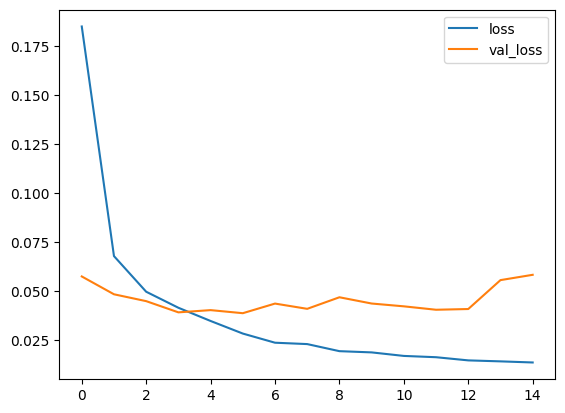

In [ ]:
#plot loss
import matplotlib.pyplot as plt
plt.plot(model_train.history['loss'], label='loss')
plt.plot(model_train.history['val_loss'], label='val_loss')
plt.legend()

<Figure size 400x600 with 0 Axes>

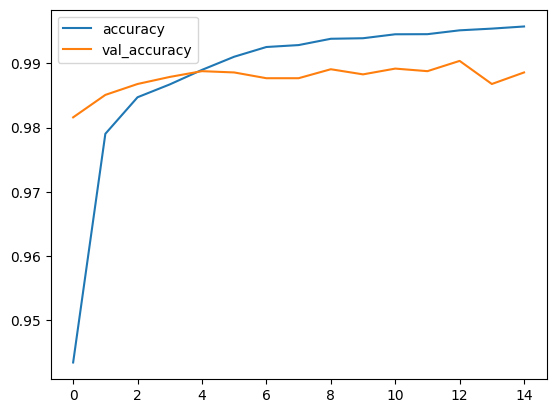

<Figure size 400x600 with 0 Axes>

In [ ]:
#plot accuracy
plt.plot(model_train.history['accuracy'], label='accuracy')
plt.plot(model_train.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.figure(figsize=(4, 6))

In [ ]:
#model is evaluate here
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0582 - accuracy: 0.9886
[0.05823037028312683, 0.9886000156402588]


down matrix design using above part

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalisation


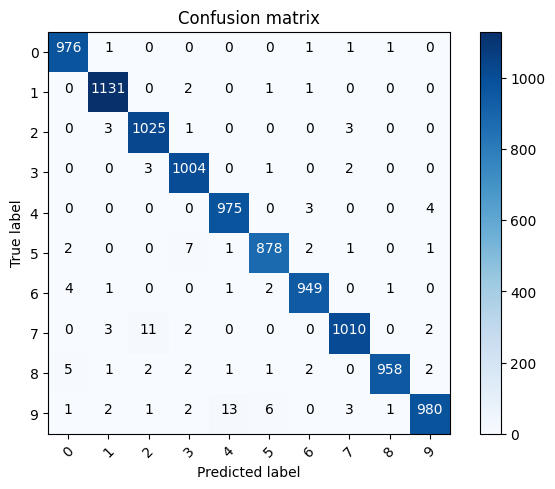

<Figure size 400x400 with 0 Axes>

In [ ]:
#confusion matrix design
p_test = model.predict(x_test).argmax(axis=1)
plot_confusion_matrix(confusion_matrix(y_test, p_test), list(range(10)))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.figure(figsize=(4, 4))
plt.show()

In [ ]:
confusion_matrix(y_test, p_test)

array([[ 976,    1,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1131,    0,    2,    0,    1,    1,    0,    0,    0],
       [   0,    3, 1025,    1,    0,    0,    0,    3,    0,    0],
       [   0,    0,    3, 1004,    0,    1,    0,    2,    0,    0],
       [   0,    0,    0,    0,  975,    0,    3,    0,    0,    4],
       [   2,    0,    0,    7,    1,  878,    2,    1,    0,    1],
       [   4,    1,    0,    0,    1,    2,  949,    0,    1,    0],
       [   0,    3,   11,    2,    0,    0,    0, 1010,    0,    2],
       [   5,    1,    2,    2,    1,    1,    2,    0,  958,    2],
       [   1,    2,    1,    2,   13,    6,    0,    3,    1,  980]])

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


Text(0.5, 1.0, ' True label:[2] Predicted: [7]')

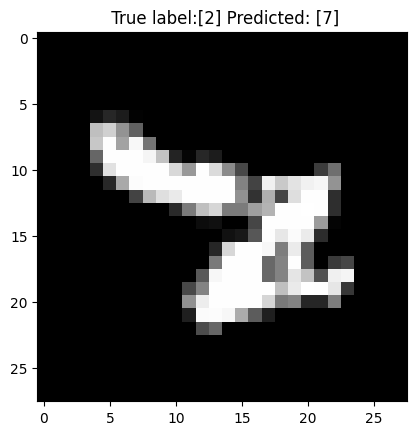

In [ ]:
#misclassified examples
misclassified_ex = np.where (p_test != y_test) [0]
i = np.random.choice(misclassified_ex)
plt.imshow(x_test[i], cmap='gray')
plt.title(" True label:%s Predicted: %s" % ([y_test[i]], [p_test[i]]))